In [202]:
import datetime, requests, time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [203]:
def get_market_data(market, granularity):
    resp = requests.get('https://api.pro.coinbase.com/products/' + market + '/candles?granularity=' + str(granularity))
    if resp.status_code != 200:
        raise Exception(format(resp.json()['message']))
    else:
        df = pd.DataFrame(resp.json(), columns=[ 'epoch', 'low', 'high', 'open', 'close', 'volume' ])
        df = df.iloc[::-1].reset_index()
        return df

In [204]:
df = get_market_data('BTC-GBP', 86400)

In [205]:
df.head()

,index,epoch,low,high,open,close,volume
0,299,1594339200,7264.73,7392.00,7349.77,7379.98,648.300341
1,298,1594425600,7302.00,7387.39,7380.00,7342.20,279.895227
2,297,1594512000,7291.00,7419.00,7342.20,7377.00,391.578354
3,296,1594598400,7325.00,7416.86,7386.75,7370.86,732.730017
4,295,1594684800,7278.00,7402.00,7368.98,7383.14,639.314651


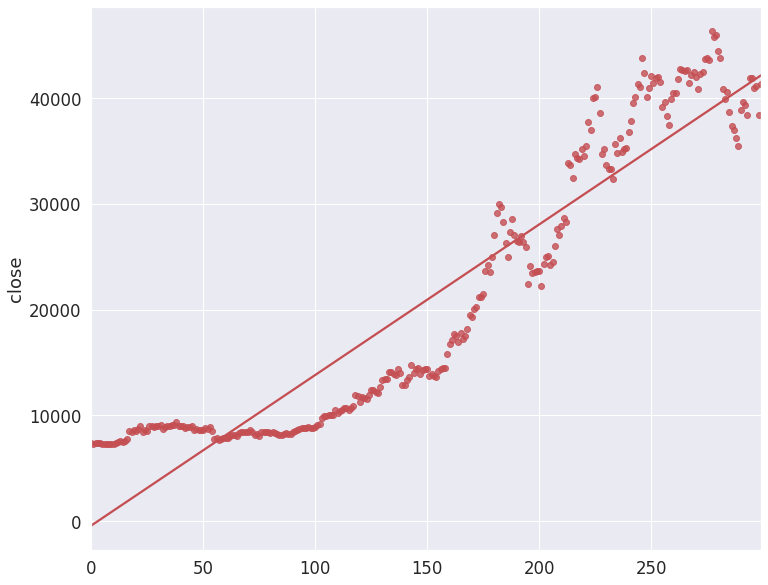

In [208]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,10))
sns.regplot(x=df.index, y='close', data=df, ci=None, color='r')

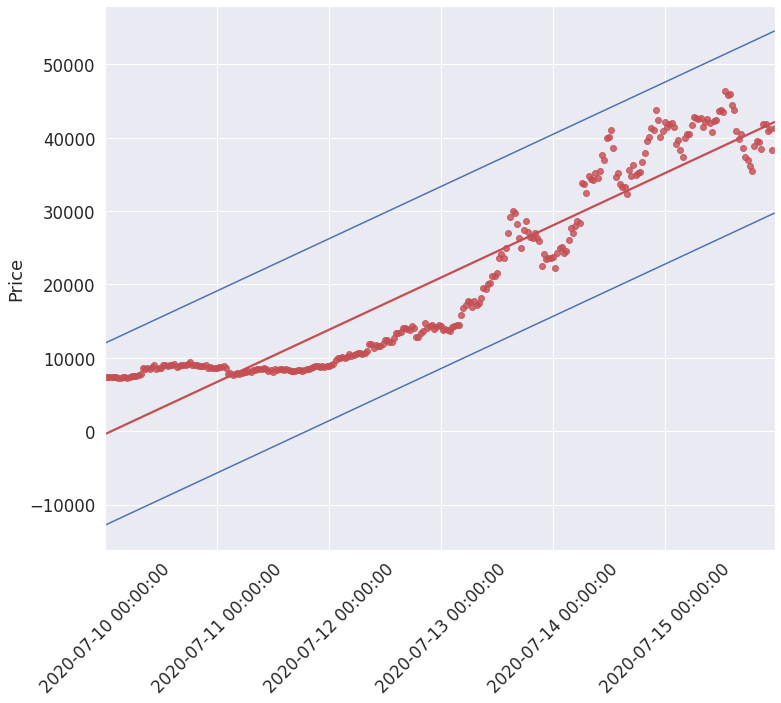

In [217]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,10))
rp = sns.regplot(x=df.index, y='close', data=df, ci=None, color='r')

y_rp = rp.get_lines()[0].get_ydata()
x_rp = rp.get_lines()[0].get_xdata()
sns.lineplot(x=x_rp, y=y_rp + np.std(y_rp), color='b')
sns.lineplot(x=x_rp, y=y_rp - np.std(y_rp), color='b')

tsidx = pd.DatetimeIndex(pd.to_datetime(df['epoch'], unit='s'), dtype='datetime64[ns]', freq='D')
rp.set_xticklabels(tsidx, rotation=45)

plt.xlabel('')
plt.ylabel('Price')
plt.show()